In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data =pd.read_csv('D:\Study\AI Advanced\Diabetes\Data\diabetes_prediction_dataset.csv')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\amr samy\AppData\Local\Temp\ipykernel_5948\2489683731.py:1: SyntaxWarning: invalid escape sequence '\S'
  data =pd.read_csv('D:\Study\AI Advanced\Diabetes\Data\diabetes_prediction_dataset.csv')


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
data.shape

(100000, 9)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: xlabel='age', ylabel='Count'>

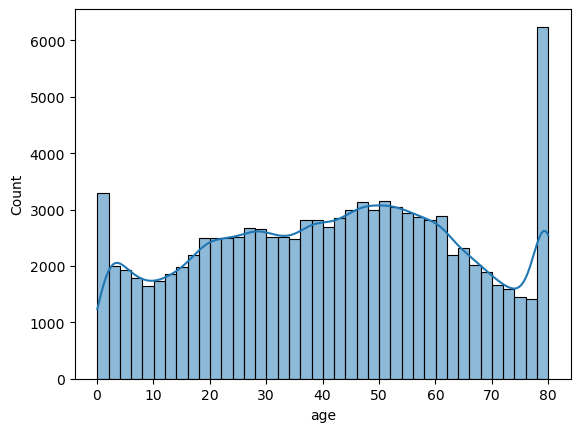

In [5]:
sns.histplot(data= data['age'] ,kde= True ,bins=40)

<Axes: xlabel='age'>

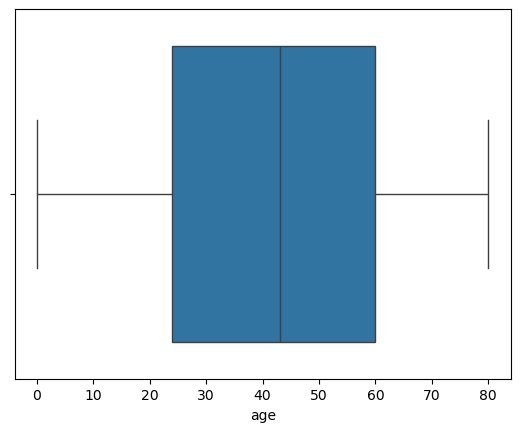

In [6]:
sns.boxplot(x=data['age'])


<Axes: xlabel='bmi'>

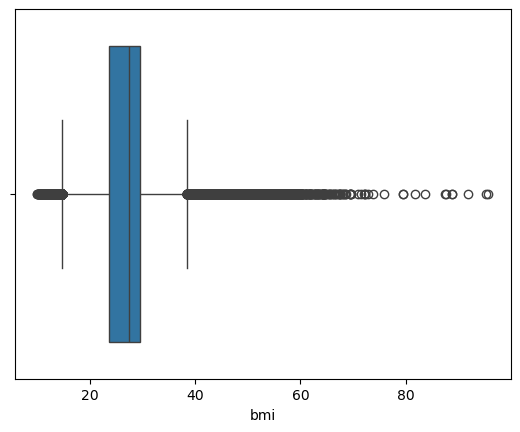

In [7]:
sns.boxplot(x =data['bmi'])

<Axes: xlabel='bmi', ylabel='Count'>

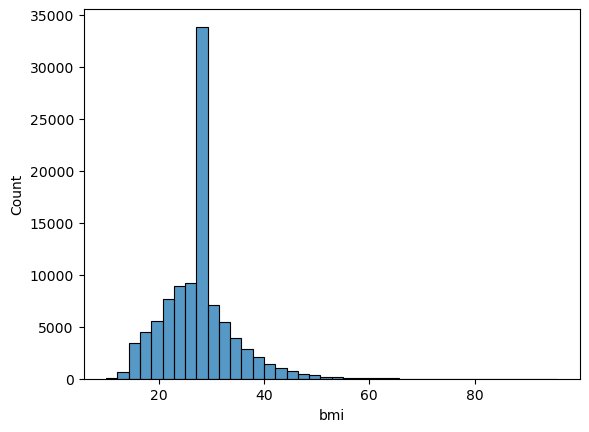

In [8]:
sns.histplot(data= data['bmi'] ,bins=40)

In [9]:
# valide bmi range between   12 -> 60    use Winsorization clip

data['bmi'] =data['bmi'].clip(lower =12 ,upper =60)

data['bmi'].describe()

count    100000.000000
mean         27.313718
std           6.588277
min          12.000000
25%          23.630000
50%          27.320000
75%          29.580000
max          60.000000
Name: bmi, dtype: float64

<Axes: xlabel='bmi'>

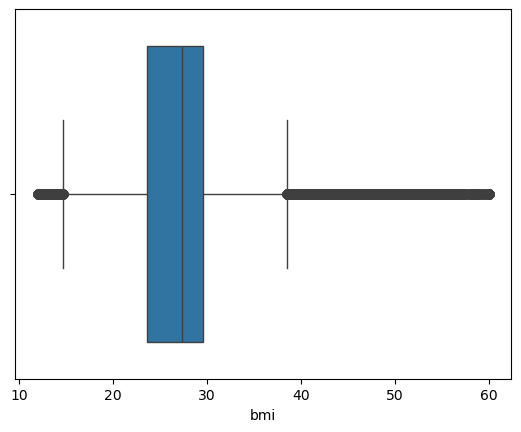

In [10]:
sns.boxplot(x =data['bmi'])

In [11]:
# Create a separate copy of the data for models that require scaling
data_scaled =data.copy()

In [12]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
numeric_cols = ['age','bmi','HbA1c_level','blood_glucose_level']
data_scaled[numeric_cols] = scaler.fit_transform(data_scaled[numeric_cols])

In [13]:
data_scaled.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.692704,0,1,never,-0.322350,1.001706,0.047704,0
1,Female,0.538006,0,0,No Info,0.000954,1.001706,-1.426210,0
2,Male,-0.616691,0,0,never,0.000954,0.161108,0.489878,0
3,Female,-0.261399,0,0,current,-0.586456,-0.492690,0.416183,0
4,Male,1.515058,1,1,current,-1.088866,-0.679490,0.416183,0


data ---> tree-based models





data_scaled ---> linear/distance-based models

In [14]:
data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [15]:
data['gender'] = data['gender'].replace('Other', 'Male')

data = pd.get_dummies(data, columns=['gender'], drop_first=True)

In [16]:
data.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male
0,80.0,0,1,never,25.19,6.6,140,0,False
1,54.0,0,0,No Info,27.32,6.6,80,0,False
2,28.0,0,0,never,27.32,5.7,158,0,True
3,36.0,0,0,current,23.45,5.0,155,0,False
4,76.0,1,1,current,20.14,4.8,155,0,True


In [17]:
data['gender_Male'].value_counts()

gender_Male
False    58552
True     41448
Name: count, dtype: int64

In [18]:
data_scaled['gender'] =data_scaled['gender'].replace('Other', 'Male')

data_scaled =pd.get_dummies(data_scaled ,columns =['gender'] ,drop_first =True)

In [19]:
data_scaled.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male
0,1.692704,0,1,never,-0.322350,1.001706,0.047704,0,False
1,0.538006,0,0,No Info,0.000954,1.001706,-1.426210,0,False
2,-0.616691,0,0,never,0.000954,0.161108,0.489878,0,True
3,-0.261399,0,0,current,-0.586456,-0.492690,0.416183,0,False
4,1.515058,1,1,current,-1.088866,-0.679490,0.416183,0,True


In [20]:
data['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Label Encoding --->  tree based models


One-hot Encoding ---> Linear based models

In [21]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
data['smoking_history'] = le.fit_transform(data['smoking_history'])

In [22]:
data.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male
0,80.0,0,1,4,25.19,6.6,140,0,False
1,54.0,0,0,0,27.32,6.6,80,0,False
2,28.0,0,0,4,27.32,5.7,158,0,True
3,36.0,0,0,1,23.45,5.0,155,0,False
4,76.0,1,1,1,20.14,4.8,155,0,True


In [23]:
data['smoking_history'].value_counts()

smoking_history
0    35816
4    35095
3     9352
1     9286
5     6447
2     4004
Name: count, dtype: int64

In [24]:
data_scaled.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male
0,1.692704,0,1,never,-0.322350,1.001706,0.047704,0,False
1,0.538006,0,0,No Info,0.000954,1.001706,-1.426210,0,False
2,-0.616691,0,0,never,0.000954,0.161108,0.489878,0,True
3,-0.261399,0,0,current,-0.586456,-0.492690,0.416183,0,False
4,1.515058,1,1,current,-1.088866,-0.679490,0.416183,0,True


In [25]:
data_scaled = pd.get_dummies(data_scaled, columns=['smoking_history'], drop_first=True)

In [26]:
data_scaled.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,0,1,-0.322350,1.001706,0.047704,0,False,False,False,False,True,False
1,0.538006,0,0,0.000954,1.001706,-1.426210,0,False,False,False,False,False,False
2,-0.616691,0,0,0.000954,0.161108,0.489878,0,True,False,False,False,True,False
3,-0.261399,0,0,-0.586456,-0.492690,0.416183,0,False,True,False,False,False,False
4,1.515058,1,1,-1.088866,-0.679490,0.416183,0,True,True,False,False,False,False


In [27]:
data_tree =data.copy()
data_tree.head()


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male
0,80.0,0,1,4,25.19,6.6,140,0,False
1,54.0,0,0,0,27.32,6.6,80,0,False
2,28.0,0,0,4,27.32,5.7,158,0,True
3,36.0,0,0,1,23.45,5.0,155,0,False
4,76.0,1,1,1,20.14,4.8,155,0,True


In [29]:
data_tree.to_csv("data_preprocessed_tree.csv" ,index =False)

In [30]:
data_scaled.to_csv("data_preprocessed_scaled.csv" ,index =False)

In [31]:
%whos

Variable         Type              Data/Info
--------------------------------------------
LabelEncoder     type              <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
StandardScaler   type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
data             DataFrame                 age  hypertension<...>[100000 rows x 9 columns]
data_scaled      DataFrame                     age  hyperten<...>100000 rows x 13 columns]
data_tree        DataFrame                 age  hypertension<...>[100000 rows x 9 columns]
le               LabelEncoder      LabelEncoder()
np               module            <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
numeric_cols     list              n=4
pd               module            <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
plt              module            <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
scaler           StandardScaler    StandardScaler()
sns              module            <modul